## Install dependencies

In [1]:
pip install matplotlib seaborn yfinance pandas_datareader xlrd datetime

    100% |████████████████████████████████| 61kB 422kB/s 
    100% |████████████████████████████████| 174kB 77kB/s 
Note: you may need to restart the kernel to use updated packages.


# Question #1

### Report Class

In [40]:
import yfinance as yfin
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import time
import seaborn as sns
from pandas_datareader import data as pdr



def true_range(high, low, previous_close=0):
    return max(abs(high - low),
               abs(high - previous_close),
               abs(low - previous_close))
   


In [124]:
class Reports:

    def __init__(self):
        self.data = None
        self.atr = None
        self.tr = None
        self.retrieve_data()

    # Retrieve data from yahoo finances
    def retrieve_data(self):
        self.data = pdr.get_data_yahoo('SPY')
        return self.data.tail()

    # Calculate simple average in days
    def simple_average(self, days):
        data = self.data.tail(days)
        return str(sum(data["Close"]) / days)
   
    
    def set_true_range(self):
        info = self.data
        tr = []
        for i in range(len(self.data)):
            high = self.data.loc[:, "High"][-1+i]
            low = self.data.loc[:, "Low"][-1+i]
            previous = self.data.loc[:, "Close"][-2+i]
            tr.append(true_range(high,low,previous))
        
        info["TR"] = tr
        self.data = info
        
    def set_avg_5th_range(self):
        info = self.data
        result = []
        for i in range(len(info)):
            if i < 5:
                result.append(0)
            else:
                sum = 0
                for j in range(i,i-5,-1):
                    #print(info["TR"][j],"index:",i)
                    sum += info["TR"][j]
                result.append(sum/5)
                
        
        info["AVG5"] = result
        self.data = info
                    

    # Average true range in days
    def average_true_range(self, num):
        last_num_days = self.data.tail(num + 1)
        # Exlude the last day
        last_num_days = last_num_days.iloc[:-1, :]
        avg = []
        for i in range(last_num_days.shape[0]):
            high = last_num_days.loc[:, "High"][i]
            low = last_num_days.loc[:, "Low"][i]
            previus_one = 0 if i <= 0 else i - 1
            previous_close = last_num_days.loc[:, "Close"][previus_one]
            result = true_range(high, low, previous_close)
            avg.append(result)
            

        return np.mean(avg)
    
    
        

    # Daily % return
    def daily_return(self, days):
        data = self.data.tail(days)
        dif = data.loc[:, "Close"][-1] - data.loc[:, "Close"][0]
        return dif / 100 * data.loc[:, "Close"][0]

   

    # You can adjust by parameter the scale of the higher values 
    #num : scale to compare values and get higher values
    #Kind: 'tr'for True Range or 'avg' for Average True range of Last 5 days
    def optimize(self,num,kind=0):
        
        result = {}
        info = self.data
        mean = 0
        if kind.lower is "tr":
            mean = info["TR"].mean()
        else:
            mean = info["AVG5"].mean()
        rank = mean +  mean * num
        
        for i in range(len(self.data)):
            if kind.lower is "tr":
                value = info["TR"][i]
            else:
                value = info["AVG5"][i]
    
            if value > rank:
                date = info.index[i].strftime("%m/%d/%y")
                result[date] = value
                
                
            
                
                
                
        return result
                
                
            


### Main

In [125]:
report = Reports()
report.set_true_range()
report.data["TR"][1]=report.data.loc[:,["TR"]].median()
report.set_avg_5th_range()

current_TR = report.data["TR"][-1]
avg_tr = report.average_true_range(5)
daily_return = report.daily_return(5)




    







### Data Cleanning

In [126]:
report.data["AVG5"].max()

9.918002319335937

### Running 

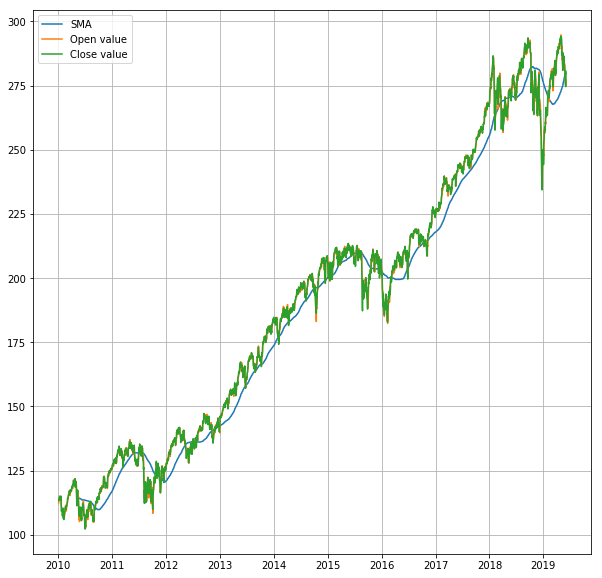

In [127]:
sma_ndays = report.data["Close"].rolling(100).mean()
plt.figure(figsize=(10,10))
plt.grid(True)
plt.plot(sma_ndays,label='SMA')
plt.plot(report.data["Open"],label='Open value')
plt.plot(report.data["Close"],label='Close value')


plt.legend(loc=2)

In [128]:
print("The current TR is {0}".format(current_TR))
print("The avg tr in the last 5 days is {0}".format(avg_tr))
if current_TR < avg_tr:
    ans = "The % of return was {0} and the SMA was {1}".format(daily_return, sma)
else:
    ans = "The current TR is not lower than the Average TR"
print(ans)

The current TR is 3.459991455078125
The avg tr in the last 5 days is 3.38800048828125
The current TR is not lower than the Average TR


## Optimization

In [132]:
result = report.optimize(2,"AVG5")

In [133]:
result

{'08/11/11': 6.464002990722657,
 '08/12/11': 6.568002319335937,
 '08/26/15': 7.45999755859375,
 '08/27/15': 8.439999389648438,
 '08/28/15': 8.510000610351563,
 '08/31/15': 7.596002197265625,
 '02/07/18': 6.941998291015625,
 '02/08/18': 7.3739990234375,
 '02/09/18': 9.01400146484375,
 '02/12/18': 9.918002319335937,
 '02/13/18': 8.512002563476562,
 '02/14/18': 6.974002075195313,
 '02/15/18': 7.1580047607421875,
 '03/28/18': 6.434002685546875,
 '03/29/18': 6.630010986328125,
 '04/02/18': 6.30201416015625,
 '04/03/18': 6.656008911132813,
 '04/09/18': 6.286001586914063,
 '10/17/18': 6.4280029296875,
 '10/29/18': 6.7219970703125,
 '10/30/18': 8.21199951171875,
 '10/31/18': 7.93199462890625,
 '11/01/18': 7.21199951171875,
 '11/02/18': 6.584002685546875,
 '12/10/18': 6.675994873046875,
 '12/11/18': 7.417999267578125,
 '12/12/18': 7.54599609375,
 '12/13/18': 6.639996337890625,
 '12/21/18': 6.865997314453125,
 '12/24/18': 7.708001708984375,
 '12/26/18': 7.598001098632812,
 '12/27/18': 9.14799804

In [134]:
result = report.optimize(2,"tr")

In [136]:
def print_optimization():
    plt.figure(figsize=(15,10))
    date = list(result.keys())
    value = list(result.values())
    bar = sns.barplot(x=date,y=value)
    plt.xticks(rotation=45)

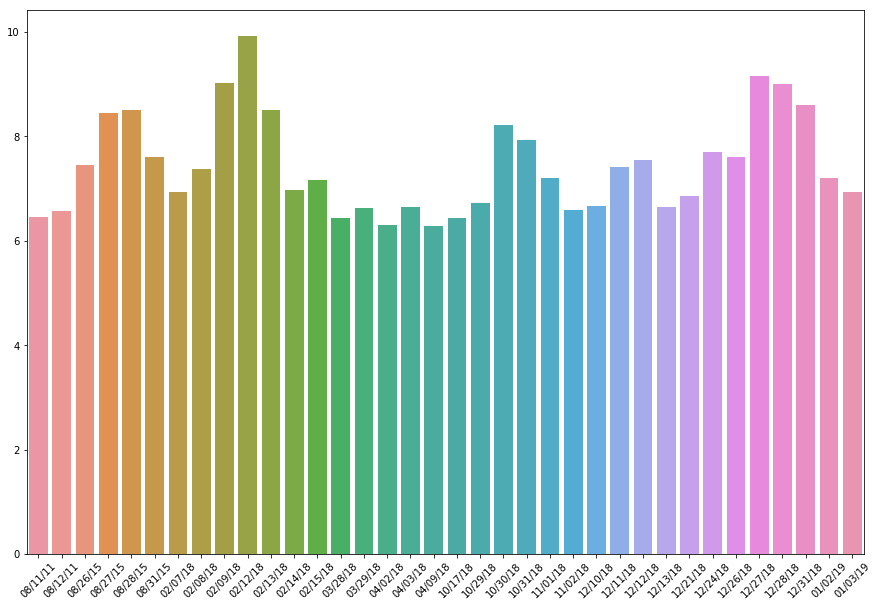

In [137]:
print_optimization()

# QUESTION #2

### Cleanner class

In [140]:
import pandas as pd
import datetime as dt
import numpy as np
from collections import Counter

class Cleanner():

    def __init__(self):
        self.data = None
        self.clean()

    # Delete some NaN dates
    def clean(self):
        data = pd.read_excel("test for trigger dates.xlsx")
        data = data.iloc[:, :3]
        data = data.dropna()
        #sns.countplot(data["date start"])
        self.data = data

    # Sort data by month and create a dictionary to store days
    def sort_data(self):
        data = self.data
        result = {}
        for value in data["date start"]:
            month_str = value.strftime("%B")
            if month_str not in result:
                result[month_str] = []
            else:
                result[month_str].append(value.day)
                result[month_str] = list(result[month_str])

        return result
    
    # Show and count how many times a day repeat trought the time
    def show_data(self):
        result = {}
        data = self.sort_data()
        for value in data.keys():
            result[value] = Counter(data[value])
        
        return result
    
    
        

            
    
    
 
        
    


In [141]:
cln = Cleanner()

In [142]:
data = cln.show_data()

In [243]:
data

{'January': Counter({28: 4,
          12: 3,
          5: 3,
          13: 1,
          20: 5,
          27: 1,
          19: 2,
          3: 3,
          17: 2,
          4: 3,
          16: 1,
          2: 2,
          9: 2,
          10: 2,
          8: 2,
          30: 3,
          23: 3,
          29: 3,
          11: 1,
          7: 2,
          31: 1,
          25: 1,
          18: 1,
          6: 1,
          26: 1}),
 'February': Counter({13: 3,
          8: 5,
          25: 1,
          14: 2,
          2: 4,
          5: 2,
          22: 1,
          7: 3,
          18: 1,
          17: 3,
          3: 1,
          12: 1,
          16: 1,
          6: 2,
          15: 1,
          11: 4,
          24: 1,
          1: 2,
          23: 1,
          26: 1}),
 'March': Counter({16: 1,
          29: 2,
          4: 3,
          12: 2,
          31: 2,
          2: 1,
          7: 4,
          30: 1,
          20: 4,
          22: 1,
          8: 2,
          21: 3,
          28: 

In [325]:
def sort_dict(mydict):
    result = {}
    for key, value in sorted(mydict.items(), key=lambda item: item[1],reverse=True):
        result[key] = value
    
    return result

#Get the higher num of repeated data
def optimize(num):
    info = cln.show_data()
    result = {}
    
    for row in info.items():
        
        
        days = list(row[1].keys())
        values = list(row[1].values())
        count = {}
        for i in range(0,num):
          
            count[days[i]] = values[i]
            #print(values[i])
        
        result[row[0]] = count
        #print("-----------")
        #print(row[0])
        ratio = sum(list(result[row[0]].values()))
        total = sum(list(values))
        #print("Rate used: {0}".format(total/ratio))
      
        
    

        sort_dict(result[row[0]])
        
        
    
    return result
        
    
            
            
            


In [327]:
optimize(3)

ValueError: dictionary update sequence element #0 has length 7; 2 is required

## VISUALIZE 

TypeError: optimize() missing 1 required positional argument: 'num'

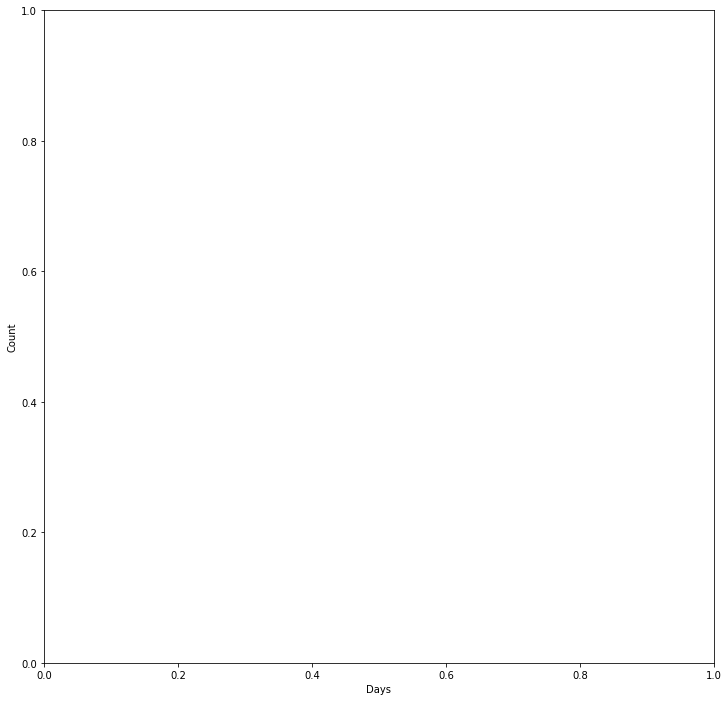

In [305]:
plt.figure(figsize=(12,12))
plt.xlabel("Days")
plt.ylabel("Count")

result = optimize()
for key in result.keys():
    values = list(result[key].keys())
    freq = list(result[key].values())
    sns.barplot(x=values,y=freq)